In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

mnist = tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

total_num = len(train_images)
valid_split = 0.2  #验证集比例20%
train_num = int(total_num*(1-valid_split)) #训练集数目

train_x = train_images[:train_num]
train_y = train_labels[:train_num]

valid_x = train_images[train_num:]
valid_y = train_labels[train_num:]

test_x = test_images
test_y = test_labels

valid_x.shape

(12000, 28, 28)

In [2]:
train_x = train_x.reshape(-1,784)
valid_x = valid_x.reshape(-1,784)
test_x = test_x.reshape(-1,784)

train_x = tf.cast(train_x/255.0,tf.float32)
valid_x = tf.cast(valid_x/255.0,tf.float32)
test_x = tf.cast(test_x/255.0,tf.float32)

train_x[1]

<tf.Tensor: id=9, shape=(784,), dtype=float32, numpy=
array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0

In [3]:
train_y = tf.one_hot(train_y,depth=10)
valid_y = tf.one_hot(valid_y,depth=10)
test_y = tf.one_hot(test_y,depth=10)
train_y

<tf.Tensor: id=14, shape=(48000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)>

In [11]:
def model(x, w, b):
    pred = tf.matmul(x,w)+b
    return tf.nn.softmax(pred)

W = tf.Variable(tf.random.normal([784,10],mean=0.0,stddev=1.0,dtype=tf.float32))
B = tf.Variable(tf.zeros([10]),dtype = tf.float32)

def loss(x, y, w, b):
    pred = model(x, w, b)
    loss_ = tf.keras.losses.categorical_crossentropy(y_true=y,y_pred=pred)
    return tf.reduce_mean(loss_)

training_epochs = 20
batch_size = 50
learning_rate = 0.001

def grad(x,y,w,b):
    with tf.GradientTape() as tape:
        loss_ = loss(x,y,w,b)
    return tape.gradient(loss_,[w,b])

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

def accuracy(x,y,w,b):
    pred = model(x,w,b)
    correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
    return tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

total_step = int(train_num/batch_size)

loss_list_train = []
loss_list_valid = []
acc_list_train = []
acc_list_valid = []

for epoch in range (training_epochs):
    for step in range(total_step):
        xs = train_x[step*batch_size:(step+1)*batch_size]
        ys = train_y[step*batch_size:(step+1)*batch_size]
        
        grads = grad(xs,ys,W,B)
        optimizer.apply_gradients(zip(grads,[W,B]))
        
    loss_train = loss(train_x,train_y,W,B).numpy()
    loss_valid = loss(valid_x,valid_y,W,B).numpy()
    acc_train = accuracy(train_x,train_y,W,B).numpy()
    acc_valid = accuracy(valid_x,valid_y,W,B).numpy()
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    acc_list_train.append(acc_train)
    acc_list_valid.append(acc_valid)
    print("epoch={:3d},train_loss={:.4f},train_acc={:.4f},val_loss={:.4f},val_acc={:.4f}".format(epoch+1,loss_train,acc_train,loss_valid,acc_valid))

epoch=  1,train_loss=1.6898,train_acc=0.6748,val_loss=1.5987,val_acc=0.6885
epoch=  2,train_loss=1.0228,train_acc=0.7891,val_loss=0.9610,val_acc=0.8037
epoch=  3,train_loss=0.8008,train_acc=0.8313,val_loss=0.7606,val_acc=0.8398
epoch=  4,train_loss=0.6831,train_acc=0.8542,val_loss=0.6559,val_acc=0.8587
epoch=  5,train_loss=0.6088,train_acc=0.8676,val_loss=0.5907,val_acc=0.8717
epoch=  6,train_loss=0.5560,train_acc=0.8758,val_loss=0.5450,val_acc=0.8802
epoch=  7,train_loss=0.5166,train_acc=0.8827,val_loss=0.5116,val_acc=0.8857
epoch=  8,train_loss=0.4858,train_acc=0.8884,val_loss=0.4861,val_acc=0.8888
epoch=  9,train_loss=0.4612,train_acc=0.8929,val_loss=0.4661,val_acc=0.8932
epoch= 10,train_loss=0.4406,train_acc=0.8965,val_loss=0.4496,val_acc=0.8962
epoch= 11,train_loss=0.4234,train_acc=0.8995,val_loss=0.4358,val_acc=0.8981
epoch= 12,train_loss=0.4085,train_acc=0.9020,val_loss=0.4240,val_acc=0.8998
epoch= 13,train_loss=0.3956,train_acc=0.9040,val_loss=0.4137,val_acc=0.9024
epoch= 14,tr

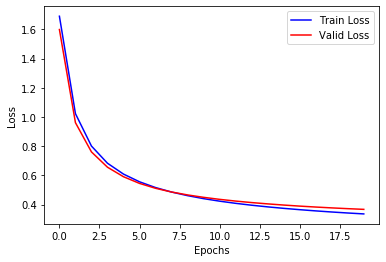

In [12]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_list_train,'blue',label="Train Loss")
plt.plot(loss_list_valid,'red',label="Valid Loss")
plt.legend(loc=1)

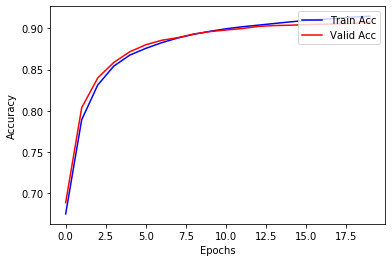

In [13]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(acc_list_train,'blue',label="Train Acc")
plt.plot(acc_list_valid,'red',label="Valid Acc")
plt.legend(loc=1)

In [14]:
acc_test = accuracy(test_x,test_y,W,B).numpy()
print("Test accuracy:",acc_test)

Test accuracy: 0.9081


In [16]:
def predict(x,w,b):
    pred = model(x,w,b)
    result = tf.argmax(pred,1).numpy()
    return result

pred_test = predict(test_x,W,B)
pred_test[0]

7

In [17]:
def plot_images_labels_prediction(images,
                                  labels,
                                  preds,
                                  index=0,
                                  num=10):
    fig = plt.gcf()
    fig.set_size_inched(10,4)
    if num>10:
        num = 10
    for i in range(0,num):
        ax = plt.subplot(2,5,i+1)
        
        ax.imshow(np.reshape(images[index],(28,28),cmap-'binary')
        
        title = "label=" + str(labels[index])
        if len(preds)>0:
            title +=",predict="+str(preds[index])
        
        ax.set_title(title,fontsize-10)
        ax.set_xticks([])
        ax.set_yticks([])
        index = index + 1
    plt.show()

SyntaxError: invalid syntax (<ipython-input-17-a45109fafa40>, line 15)

In [19]:
plot_images_labels_prediction(test_images,test_labels,pred_test,10,10)

NameError: name 'plot_images_labels_prediction' is not defined

In [ ]:
_